In [ ]:
#https://www.digitalocean.com/community/tutorials/how-to-scrape-web-pages-with-beautiful-soup-and-python-3

In [2]:
import requests
from bs4 import BeautifulSoup
import csv

ModuleNotFoundError: No module named 'bs4'

In [ ]:
page = requests.get('https://web.archive.org/web/20121007172955/https://www.nga.gov/collection/anZ1.htm')

In [ ]:
soup = BeautifulSoup(page.text, 'html.parser')

In [ ]:
# Remove bottom links
last_links = soup.find(class_='AlphaNav')
last_links.decompose()

In [ ]:
# Pull all text from the BodyText div
artist_name_list = soup.find(class_='BodyText')

# Pull text from all instances of <a> tag within BodyText div
artist_name_list_items = artist_name_list.find_all('a')

In [ ]:
# Create for loop to print out all artists' names
for artist_name in artist_name_list_items:
    #print(artist_name.prettify())
    names = artist_name.contents[0]
    print(names)

In [ ]:
type(artist_name_list_items)

In [ ]:
page = requests.get('https://web.archive.org/web/20121007172955/http://www.nga.gov/collection/anZ1.htm')

soup = BeautifulSoup(page.text, 'html.parser')

last_links = soup.find(class_='AlphaNav')
last_links.decompose()

# Create a file to write to, add headers row
f = csv.writer(open('z-artist-names.csv', 'w'))
f.writerow(['Name', 'Link'])

artist_name_list = soup.find(class_='BodyText')
artist_name_list_items = artist_name_list.find_all('a')

for artist_name in artist_name_list_items:
    names = artist_name.contents[0]
    links = 'https://web.archive.org' + artist_name.get('href')


    # Add each artist’s name and associated link to a row
    f.writerow([names, links])

In [ ]:
f = csv.writer(open('z-artist-names.csv', 'w'))
f.writerow(['Name', 'Link'])

pages = []

for i in range(1, 5):
    url = 'https://web.archive.org/web/20121007172955/https://www.nga.gov/collection/anZ' + str(i) + '.htm'
    pages.append(url)


for item in pages:
    page = requests.get(item)
    soup = BeautifulSoup(page.text, 'html.parser')

    last_links = soup.find(class_='AlphaNav')
    last_links.decompose()

    artist_name_list = soup.find(class_='BodyText')
    artist_name_list_items = artist_name_list.find_all('a')

    for artist_name in artist_name_list_items:
        names = artist_name.contents[0]
        links = 'https://web.archive.org' + artist_name.get('href')

        f.writerow([names, links])

In [2]:
import sys
sys.path

['',
 'C:\\Users\\Simo\\Anaconda3\\python36.zip',
 'C:\\Users\\Simo\\Anaconda3\\DLLs',
 'C:\\Users\\Simo\\Anaconda3\\lib',
 'C:\\Users\\Simo\\Anaconda3',
 'C:\\Users\\Simo\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Simo\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Simo\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Simo\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Simo\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Simo\\.ipython']

In [ ]:
#http://www.storybench.org/how-to-scrape-reddit-with-python/

In [5]:
import praw
import pandas as pd
import datetime as dt

In [6]:
praw_id = pd.read_csv('api_keys.csv')

In [7]:
reddit = praw.Reddit(client_id=praw_id.client_id[0], \
                     client_secret=praw_id.client_secret[0], \
                     user_agent=praw_id.user_agent[0], \
                     username=praw_id.username[0], \
                     password=praw_id.password[0])




In [8]:
print(reddit.user.me())

BizarroDemocracy


In [15]:
subreddit = reddit.subreddit('Nootropics')

In [16]:
top_subreddit = subreddit.top()

In [6]:
top_subreddit

In [17]:
for submission in subreddit.top(limit=1):
    print(submission.title, submission.id)

ResponseException: received 401 HTTP response

In [9]:
topics_dict = { "title":[], \
                "score":[], \
                "id":[], "url":[], \
                "comms_num": [], \
                "created": [], \
                "body":[]}

In [10]:
for submission in top_subreddit:
    topics_dict["title"].append(submission.title)
    topics_dict["score"].append(submission.score)
    topics_dict["id"].append(submission.id)
    topics_dict["url"].append(submission.url)
    topics_dict["comms_num"].append(submission.num_comments)
    topics_dict["created"].append(submission.created)
    topics_dict["body"].append(submission.selftext)

In [11]:
topics_data = pd.DataFrame(topics_dict)

In [12]:
topics_data

,title,score,id,url,comms_num,created,body
0,This is pretty much the biggest red-alert towa...,1240,8r7ipn,https://www.reddit.com/r/Nootropics/comments/8...,471,1.529058e+09,"So essentially, there’s this bill called Stop ..."
1,How to get a scientific paper for free,1046,8x8vct,https://i.redd.it/jaom6bitms811.jpg,62,1.531146e+09,
2,People who learn how to learn can outperform t...,1010,8iy75b,https://www.researchgate.net/publication/28586...,119,1.526181e+09,
3,Hopkins researchers recommend reclassifying ps...,807,9jpmxr,https://hub.jhu.edu/2018/09/26/psilocybin-sche...,170,1.538189e+09,
4,Got a threatening message from Cortex Labs - b...,729,82q1b6,https://www.reddit.com/r/Nootropics/comments/8...,192,1.520473e+09,I rated Cortex Labs on Facebook without leavin...
5,Rhonda Patrick here. I've just released my mos...,710,5hz55y,https://youtu.be/zz4YVJ4aRfg,122,1.481605e+09,
6,Ten months of exercise treated depression at r...,667,8q3jpm,https://www.madinamerica.com/wp-content/upload...,139,1.528691e+09,
7,"Incredibly simple ADHD ""stack"". If you have ""c...",658,a6it4n,https://www.reddit.com/r/Nootropics/comments/a...,235,1.544936e+09,"**EDIT: Hey guys, glad you all like the post, ..."
8,The Big Vitamin D Mistake. A statistical error...,650,7f6i42,https://www.ncbi.nlm.nih.gov/pubmed/28768407,179,1.511546e+09,
9,I recently ordered some Ashwagandha but came a...,634,9v0xlg,https://www.reddit.com/r/Nootropics/comments/9...,115,1.541637e+09,Here's the study (it is a little dated) [https...


In [14]:
topics_data.iloc[0].title


'This is pretty much the biggest red-alert towards legal nootropics in the US.'

In [13]:
subreddit = reddit.subreddit('datascience')

In [14]:
for submission in subreddit.top(limit=1):
    print(submission.title, submission.id)

ResponseException: received 401 HTTP response

In [30]:
subreddit = reddit.subreddit('programming')

In [31]:
for submission in subreddit.top(limit=1):
    print(submission.title, submission.id)

There’s a reason that programmers always want to throw away old code and start over: they think the old code is a mess. They are probably wrong. The reason that they think the old code is a mess is because of a cardinal, fundamental law of programming: It’s harder to read code than to write it. 8f2lzu


In [ ]:
#https://praw.readthedocs.io/en/latest/tutorials/comments.html

In [32]:
submission = reddit.submission(id='8f2lzu')

In [34]:
from praw.models import MoreComments
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

I think most programmers work in a similar way: imagine a problem, then decompose the problem into its constituent parts and attack those simpler, isolated problems.

The problem with a large codebase is that no one, not even the person that wrote all of it can fit the solution in their working memory. The tendency of programmers (who generally underestimate complexity) is to say: wait a minute, this problem doesn't require 10 million LOC, I could easily solve this problem in 250 lines of elegant Haskell.

There are situations where the legacy codebase is completely unsalvagable, but I think more often than not it's throwing the baby out with the bath water, except the baby is an engine that, while flawed, is generating business value.
I think most code, no matter how well designed before hand, is designed mostly on the fly. You always run into things you didn't think of and adapt. This leads to cludges and breaking the design. Once everything is done and it works, I love nothing bette

In [35]:
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    print(top_level_comment.body)

I think most programmers work in a similar way: imagine a problem, then decompose the problem into its constituent parts and attack those simpler, isolated problems.

The problem with a large codebase is that no one, not even the person that wrote all of it can fit the solution in their working memory. The tendency of programmers (who generally underestimate complexity) is to say: wait a minute, this problem doesn't require 10 million LOC, I could easily solve this problem in 250 lines of elegant Haskell.

There are situations where the legacy codebase is completely unsalvagable, but I think more often than not it's throwing the baby out with the bath water, except the baby is an engine that, while flawed, is generating business value.
I think most code, no matter how well designed before hand, is designed mostly on the fly. You always run into things you didn't think of and adapt. This leads to cludges and breaking the design. Once everything is done and it works, I love nothing bette

In [36]:
submission.comments.replace_more(limit=None)
for comment in submission.comments.list():
    print(comment.body)

I think most programmers work in a similar way: imagine a problem, then decompose the problem into its constituent parts and attack those simpler, isolated problems.

The problem with a large codebase is that no one, not even the person that wrote all of it can fit the solution in their working memory. The tendency of programmers (who generally underestimate complexity) is to say: wait a minute, this problem doesn't require 10 million LOC, I could easily solve this problem in 250 lines of elegant Haskell.

There are situations where the legacy codebase is completely unsalvagable, but I think more often than not it's throwing the baby out with the bath water, except the baby is an engine that, while flawed, is generating business value.
I think most code, no matter how well designed before hand, is designed mostly on the fly. You always run into things you didn't think of and adapt. This leads to cludges and breaking the design. Once everything is done and it works, I love nothing bette

In [1]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set(style='darkgrid', context='talk', palette='Dark2')

In [2]:
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

In [9]:
#https://www.learndatasci.com/tutorials/sentiment-analysis-reddit-headlines-pythons-nltk/
headlines = set()

In [10]:
for submission in reddit.subreddit('politics').new(limit=None):
    headlines.add(submission.title)
    display.clear_output()
    print(len(headlines))

903


In [11]:
headlines

{'"It\'s probably exactly how my grandmother, if she was alive, would say it," Rashida Tlaib doubles down on explicit comment to impeach Trump.',
 "'Cardinal' James Comey -- The man who destroyed the FBI",
 "'ContraPoints' Is Political Philosophy Made for YouTube",
 "'Dark money' politics shadows Gov. Phil Murphy despite his call to make donor names public",
 "'It is a pleasure to blog with you': Elizabeth Warren's early years online | When a bankruptcy reform bill that contained favorable terms for the credit industry was moving through Congress in early 2005, Warren logged on.",
 "'Remarkable': the two photos revealing the divide in Washington",
 "'The election is over:' Ron DeSantis prepares to become Florida's 46th governor",
 "'The goal is not to open up the government': Sen. Graham says no shutdown end without wall",
 "'Trump Has Met His Match': Rashida Tlaib Defends 'Impeach the Motherf*****' Comments",
 "'We Should Do Our Jobs and Get the Government Open': GOP Senator Wants Con

In [13]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Simo\AppData\Roaming\nltk_data...


True

In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in headlines:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': -0.34,
  'headline': 'Erdogan spokesman says irrational to claim Turkey targets Kurds',
  'neg': 0.231,
  'neu': 0.769,
  'pos': 0.0},
 {'compound': 0.3182,
  'headline': 'Testing the limits of pardon power',
  'neg': 0.0,
  'neu': 0.685,
  'pos': 0.315},
 {'compound': -0.6486,
  'headline': 'Nancy Pelosi Says Rashida Tlaib’s ‘Motherf**ker’ Comment No Worse Than Trump',
  'neg': 0.371,
  'neu': 0.629,
  'pos': 0.0}]


In [15]:
df = pd.DataFrame.from_records(results)
df.head()

,compound,headline,neg,neu,pos
0,-0.3400,Erdogan spokesman says irrational to claim Tur...,0.231,0.769,0.000
1,0.3182,Testing the limits of pardon power,0.000,0.685,0.315
2,-0.6486,Nancy Pelosi Says Rashida Tlaib’s ‘Motherf**ke...,0.371,0.629,0.000
3,-0.4767,Russia Says U.S. FBI Arrested Russian Citizen ...,0.256,0.744,0.000
4,-0.2960,"Bolton Puts Conditions on Syria Withdrawal, Su...",0.172,0.746,0.082


In [16]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head()

,compound,headline,neg,neu,pos,label
0,-0.3400,Erdogan spokesman says irrational to claim Tur...,0.231,0.769,0.000,-1
1,0.3182,Testing the limits of pardon power,0.000,0.685,0.315,1
2,-0.6486,Nancy Pelosi Says Rashida Tlaib’s ‘Motherf**ke...,0.371,0.629,0.000,-1
3,-0.4767,Russia Says U.S. FBI Arrested Russian Citizen ...,0.256,0.744,0.000,-1
4,-0.2960,"Bolton Puts Conditions on Syria Withdrawal, Su...",0.172,0.746,0.082,-1


In [17]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [18]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

Positive headlines:

['Testing the limits of pardon power',
 "Trump says acting Cabinet members give him 'more flexibility'",
 'Who cares whether you think these women are likable. They’re in power now.',
 'Donald Trump Just Said Only “Criminals” Don’t Like the Wall. Actually, a Majority of Americans Don’t.',
 'A Top Republican Strategist Dismissed Alexandria Ocasio-Cortez as “The Little Girl.” Her Response is Perfect.']


In [19]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:20], width=200)

Positive headlines:

['Testing the limits of pardon power',
 "Trump says acting Cabinet members give him 'more flexibility'",
 'Who cares whether you think these women are likable. They’re in power now.',
 'Donald Trump Just Said Only “Criminals” Don’t Like the Wall. Actually, a Majority of Americans Don’t.',
 'A Top Republican Strategist Dismissed Alexandria Ocasio-Cortez as “The Little Girl.” Her Response is Perfect.',
 'ISIS missile injures UK special forces in Syria, reports say',
 '2019 will be a mess for America, thank God',
 'Top Trump Backer Financed Supreme Court Confirmation Fights Through Shadowy Network',
 "Watchdog group urges probe of Ivanka Trump's role in Opportunity Zone tax break",
 'Supreme Court Takes Up New Cases on Partisan Gerrymandering',
 'Trump Administration Officials May Get Huge Raises While Federal Workers Go Without Pay',
 'Park Service takes ‘extraordinary step’ of dipping into entrance fees to bolster operations at popular sites',
 'The reality check De

In [20]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    441
-1    308
 1    154
Name: label, dtype: int64
 0    48.837209
-1    34.108527
 1    17.054264
Name: label, dtype: float64


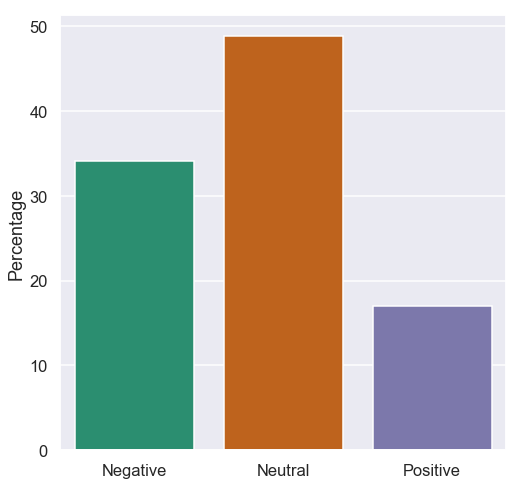

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [24]:
from nltk.tokenize import word_tokenize, RegexpTokenizer

example = "This is an example sentence! However, it isn't a very informative one"

print(word_tokenize(example, language='english'))

['This', 'is', 'an', 'example', 'sentence', '!', 'However', ',', 'it', 'is', "n't", 'a', 'very', 'informative', 'one']


In [25]:
tokenizer = RegexpTokenizer(r'\w+')
tokenizer.tokenize(example)

['This',
 'is',
 'an',
 'example',
 'sentence',
 'However',
 'it',
 'isn',
 't',
 'a',
 'very',
 'informative',
 'one']

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
print(stop_words[:20])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


In [30]:
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [31]:
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('trump', 52),
 ('top', 12),
 ('new', 12),
 ('shutdown', 12),
 ('house', 12),
 ('tax', 10),
 ('says', 9),
 ('wall', 9),
 ('ocasio', 9),
 ('cortez', 9),
 ('court', 9),
 ('security', 9),
 ('supreme', 8),
 ('democrats', 8),
 ('first', 8),
 ('us', 8),
 ('warren', 8),
 ('border', 7),
 ('like', 6),
 ('pay', 6)]

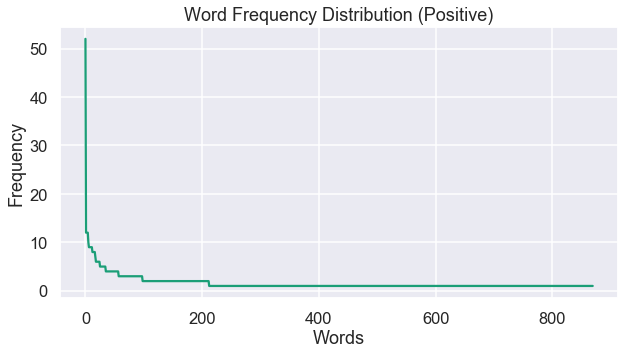

In [32]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

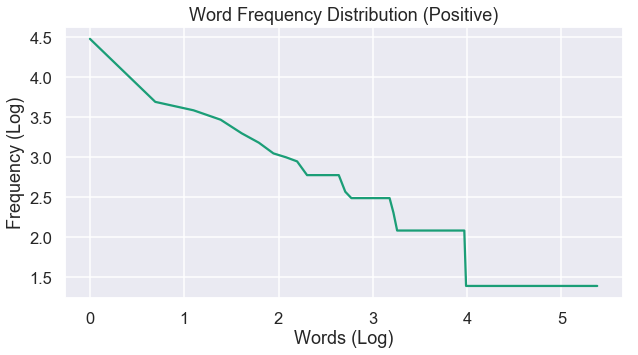

In [33]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [34]:
neg_lines = list(df2[df2.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('trump', 130),
 ('shutdown', 71),
 ('says', 35),
 ('wall', 35),
 ('government', 32),
 ('national', 31),
 ('border', 28),
 ('emergency', 27),
 ('ocasio', 16),
 ('cortez', 16),
 ('u', 15),
 ('federal', 15),
 ('build', 15),
 ('new', 13),
 ('democrats', 12),
 ('workers', 12),
 ('us', 12),
 ('could', 12),
 ('tsa', 11),
 ('calling', 11)]